Data information:

Raw data comes from National Immigrant Justice Center: https://immigrantjustice.org/ice-detention-facilities-november-2017
* Raw data download link: https://immigrantjustice.org/sites/default/files/uploaded-files/no-content-type/2018-06/ICE_Facility_List_11-06-2017-web.xlsx

I am using saved copies of that file, as well as separate files for each of its tabs, from my repo, here: https://github.com/jamiekasulis/ice_detention_facilities . Just go to the 'data' folder

In [2]:
import pandas as pd
import matplotlib
%matplotlib inline

In [3]:
# The raw data has several tabs. I want to look at the tabe called "Facilities Main - Info"
main_df = pd.read_excel("https://github.com/jamiekasulis/ice_detention_facilities/blob/master/data/raw_excel_facilities_main.xlsx?raw=true",
                                   skiprows=8)

In [4]:
# Test the df loaded in correctly
main_df.head()

,DETLOC,Name,Address,City,County,State,Zip,Circuit,AOR,Docket,...,DSM Assigned?,DSM Assignment Type,FY18 Calendar Days in Use,FY18 Possible Days,FY18 % of Days in Use,FY18 Total Mandays,FY17 Calendar Days in Use,FY17 % of Days in Use,FY17 Total Mandays,FY17 Max Pop Count
0,ABRDNWA,ABERDEEN CITY JAIL,210 EAST MARKET ST,ABERDEEN,GRAYS HARBOR,WA,98520,9,SEA,SEA,...,No,NaN,0,400,0.0000,0,0,0.000000,0,0
1,ABTHOLD,ABILENE HOLD ROOM,12071 FM 3522,ABILENE,ABILENE,TX,79601,5,DAL,ABT,...,No,NaN,0,400,0.0000,0,0,0.000000,0,0
2,ABRXSPA,ABRAXAS ACADEMY DETENTION CENTER,1000 ACADEMY DRIVE,MORGANTOWN,BERKS,PA,19543,3,PHI,BRK,...,No,NaN,35,400,0.0875,800,372,1.019178,1207,5
3,RICRANS,"ACI (CRANSTON, RHODE ISLAND)",39 HOWARD AVE,CRANSTON,PROVIDENCE,RI,2920,1,BOS,BOS,...,No,NaN,0,400,0.0000,0,0,0.000000,0,0
4,ADACOID,ADA COUNTY JAIL,7210 BARRISTER DRIVE,BOISE,ADA,ID,83704,9,SLC,HEL,...,No,NaN,0,400,0.0000,0,0,0.000000,0,0


In [4]:
# I can't find what the threshold for data suppression is, so I will try to find a miinimum FY18 Max Population.
main_df_trimmed = main_df[['FY18 Max Population Count', 'Date of Last Use']]
main_df_trimmed[(main_df_trimmed['FY18 Max Population Count'] == 0)].sort_values('Date of Last Use', ascending=False).head()

,FY18 Max Population Count,Date of Last Use
241,0,2017-11-04
701,0,2017-11-04
387,0,2017-09-30
781,0,2017-09-30
382,0,2017-09-30


In [10]:
# So I know that there are max populations of 0. 0 Might mean suppressed. Let me see the minimum nonzero value.
main_df_trimmed = main_df[['FY18 Max Population Count', 'Date of Last Use']]
main_df_trimmed[(main_df_trimmed['FY18 Max Population Count'] != 0)].sort_values('Date of Last Use', ascending=False).head()

,FY18 Max Population Count,Date of Last Use
2,2,2017-11-04
1117,72,2017-11-04
1161,229,2017-11-04
1160,9,2017-11-04
1159,36,2017-11-04


In [11]:
# Are there nonzero values even as small as 1?
main_df_trimmed = main_df[['FY18 Max Population Count', 'Date of Last Use']]
main_df_trimmed[(main_df_trimmed['FY18 Max Population Count'] == 1)].sort_values('Date of Last Use', ascending=False).head()

,FY18 Max Population Count,Date of Last Use
384,1,2017-11-04
574,1,2017-11-04
92,1,2017-11-04
1132,1,2017-11-04
1026,1,2017-11-04


In [12]:
# Maybe suppressions are listed as negatives. Are there negative max populations?
main_df_trimmed = main_df[['FY18 Max Population Count', 'Date of Last Use']]
main_df_trimmed[(main_df_trimmed['FY18 Max Population Count'] < 0)].sort_values('Date of Last Use', ascending=False).head()

,FY18 Max Population Count,Date of Last Use


* I will have to ask the owner of this data why it is that there are FY18 Max Pops of 0 but the facility had been used in 2017, the year this data was published. It says that Date of Last/First Use is counted as the last/first day with a midnight count manday, so it can't be the case that someone isn't counted into max pop because they are checked out before midnight. __Find out about this by calling the number listed here: https://immigrantjustice.org/press-room-contact-us__
* As far as data suppression goes, it seems like Max Pop is not suppressed. I see no negative value max pops, but max pops everywhere from 0, 1, 2, and up.
* ADP is a rate (# over time) so 0.000 does not necessarily mean suppressed-- could be a very small number that is calculated that rounds to 0. I will have to call them and ask.

In [14]:
# How often are facilities being used?
main_df['FY17 Calendar Days in Use'].describe()

count    1685.000000
mean       68.648665
std       133.388094
min         0.000000
25%         0.000000
50%         0.000000
75%        25.000000
max       372.000000
Name: FY17 Calendar Days in Use, dtype: float64

Of 1685 facilities...
* The average number of days they were in use during FY17 is 68.64.
* The number of days facilities were in use ranges from 0 to 372 (the entire fiscal year, I believe).

In [16]:
# Some facilities in use every day of the fiscal year
main_df[['Name', 'State', 'FY17 Calendar Days in Use']].sort_values('FY17 Calendar Days in Use', ascending=False).head()

,Name,State,FY17 Calendar Days in Use
1338,SAINT CLAIR COUNTY JAIL,MI,372
1213,Redacted,Redacted,372
1100,Redacted,Redacted,372
286,CLINTON COUNTY CORRECTIONAL FACILITY,PA,372
1102,Redacted,Redacted,372


In [17]:
# It seems like they calculate their % of days in use as Days in Use / 365, not over the length of the fiscal year.
main_df[['Name', 'State', 'FY17 % of Days in Use']].sort_values('FY17 % of Days in Use', ascending=False).head()

,Name,State,FY17 % of Days in Use
1338,SAINT CLAIR COUNTY JAIL,MI,1.019178
1213,Redacted,Redacted,1.019178
1100,Redacted,Redacted,1.019178
286,CLINTON COUNTY CORRECTIONAL FACILITY,PA,1.019178
1102,Redacted,Redacted,1.019178


In [18]:
# Look at redacted facilities.
redacted_facilities = main_df[main_df['Name'] == 'Redacted']
redacted_facilities.head()

,DETLOC,Name,Address,City,County,State,Zip,Circuit,AOR,Docket,...,DSM Assigned?,DSM Assignment Type,FY18 Calendar Days in Use,FY18 Possible Days,FY18 % of Days in Use,FY18 Total Mandays,FY17 Calendar Days in Use,FY17 % of Days in Use,FY17 Total Mandays,FY17 Max Pop Count
1077,Redacted,Redacted,Redacted,Redacted,Redacted,Redacted,Redacted,10,DEN,NaN,...,No,NaN,0,400,0.0000,0,0,0.000000,0,0
1078,Redacted,Redacted,Redacted,Redacted,Redacted,Redacted,Redacted,5,SNA,HLG,...,No,NaN,0,400,0.0000,0,0,0.000000,0,0
1079,Redacted,Redacted,Redacted,Redacted,Redacted,Redacted,Redacted,2,BUF,BUF,...,No,NaN,35,400,0.0875,2834,372,1.019178,2053,8
1080,Redacted,Redacted,Redacted,Redacted,Redacted,Redacted,Redacted,2,NYC,VRK,...,No,NaN,0,400,0.0000,0,0,0.000000,0,0
1081,Redacted,Redacted,Redacted,Redacted,Redacted,Redacted,Redacted,5,HOU,HOU,...,No,NaN,0,400,0.0000,0,0,0.000000,0,0


In [19]:
# Redacted facilities who had populations > 0 in FY17
redacted_facilities[redacted_facilities['FY17 Max Pop Count'] > 0].head()

,DETLOC,Name,Address,City,County,State,Zip,Circuit,AOR,Docket,...,DSM Assigned?,DSM Assignment Type,FY18 Calendar Days in Use,FY18 Possible Days,FY18 % of Days in Use,FY18 Total Mandays,FY17 Calendar Days in Use,FY17 % of Days in Use,FY17 Total Mandays,FY17 Max Pop Count
1079,Redacted,Redacted,Redacted,Redacted,Redacted,Redacted,Redacted,2,BUF,BUF,...,No,NaN,35,400,0.0875,2834,372,1.019178,2053,8
1082,Redacted,Redacted,Redacted,Redacted,Redacted,Redacted,Redacted,5,HOU,HOU,...,No,NaN,35,400,0.0875,13280,372,1.019178,34796,228
1083,Redacted,Redacted,Redacted,Redacted,Redacted,Redacted,Redacted,5,SNA,HLG,...,No,NaN,35,400,0.0875,14240,372,1.019178,11381,55
1084,Redacted,Redacted,Redacted,Redacted,Redacted,Redacted,Redacted,5,SNA,HLG,...,No,NaN,35,400,0.0875,11303,372,1.019178,6748,38
1085,Redacted,Redacted,Redacted,Redacted,Redacted,Redacted,Redacted,3,PHI,PHI,...,No,NaN,35,400,0.0875,21223,372,1.019178,18158,87


In [20]:
#DSM Assigned? "Indicates if a facility is monitored for compliance with ICE detention standards"
dsm_assigned_y = main_df[main_df['DSM Assigned?'] == 'Yes']
print("Number monitored for compliance: %d" %len(dsm_assigned_y))
dsm_assigned_y.head()

Number monitored for compliance: 54


,DETLOC,Name,Address,City,County,State,Zip,Circuit,AOR,Docket,...,DSM Assigned?,DSM Assignment Type,FY18 Calendar Days in Use,FY18 Possible Days,FY18 % of Days in Use,FY18 Total Mandays,FY17 Calendar Days in Use,FY17 % of Days in Use,FY17 Total Mandays,FY17 Max Pop Count
9,ADLNTCA,ADELANTO ICE PROCESSING CENTER,10250 RANCHO ROAD,ADELANTO,SAN BERNARDINO,CA,92301,9,LOS,LOS,...,Yes,PERMANENT,35,400,0.0875,676434,372,1.019178,625414,1918
53,ATLANGA,ATLANTA CITY DETENTION CENTER,254 PEACHTREE STREET SOUTHWEST,ATLANTA,FULTON,GA,30303,11,ATL,ATL,...,Yes,ROVING,35,400,0.0875,110914,372,1.019178,93978,435
99,BERGENJ,BERGEN COUNTY JAIL,160 SOUTH RIVER STREET,HACKENSACK,BERGEN,NJ,7601,3,NYC,VRK,...,Yes,ROVING,35,400,0.0875,134377,372,1.019178,82301,324
145,BRINDMA,BRISTOL COUNTY DETENTION CENTER,400 FAUNCE CORNER ROAD,NORTH DARTMOUTH,BRISTOL,MA,2747,1,BOS,BOS,...,Yes,ROVING,35,400,0.0875,70811,372,1.019178,64241,200
160,WCCPBFL,BROWARD TRANSITIONAL CENTER,3900 NORTH POWERLINE ROAD,POMPANO BEACH,BROWARD,FL,33073,11,MIA,KRO,...,Yes,PERMANENT,35,400,0.0875,256183,361,0.989041,229121,698


In [21]:
dsm_assigned_n = main_df[main_df['DSM Assigned?'] == 'No']
print("Number not monitored for compliance: %d" %len(dsm_assigned_n))
dsm_assigned_n.head()

Number not monitored for compliance: 1631


,DETLOC,Name,Address,City,County,State,Zip,Circuit,AOR,Docket,...,DSM Assigned?,DSM Assignment Type,FY18 Calendar Days in Use,FY18 Possible Days,FY18 % of Days in Use,FY18 Total Mandays,FY17 Calendar Days in Use,FY17 % of Days in Use,FY17 Total Mandays,FY17 Max Pop Count
0,ABRDNWA,ABERDEEN CITY JAIL,210 EAST MARKET ST,ABERDEEN,GRAYS HARBOR,WA,98520,9,SEA,SEA,...,No,NaN,0,400,0.0000,0,0,0.000000,0,0
1,ABTHOLD,ABILENE HOLD ROOM,12071 FM 3522,ABILENE,ABILENE,TX,79601,5,DAL,ABT,...,No,NaN,0,400,0.0000,0,0,0.000000,0,0
2,ABRXSPA,ABRAXAS ACADEMY DETENTION CENTER,1000 ACADEMY DRIVE,MORGANTOWN,BERKS,PA,19543,3,PHI,BRK,...,No,NaN,35,400,0.0875,800,372,1.019178,1207,5
3,RICRANS,"ACI (CRANSTON, RHODE ISLAND)",39 HOWARD AVE,CRANSTON,PROVIDENCE,RI,2920,1,BOS,BOS,...,No,NaN,0,400,0.0000,0,0,0.000000,0,0
4,ADACOID,ADA COUNTY JAIL,7210 BARRISTER DRIVE,BOISE,ADA,ID,83704,9,SLC,HEL,...,No,NaN,0,400,0.0000,0,0,0.000000,0,0


In [22]:
print("There are %d facilities that are monitored for compliance with ICE detention standards, and %d that are not" \
     %(len(dsm_assigned_y), len(dsm_assigned_n)))

There are 54 facilities that are monitored for compliance with ICE detention standards, and 1631 that are not


__There are 54 facilities that are monitored for compliance with ICE detention standards, and 1631 that are not__

In [23]:
# How frequently are facilities that ARE monitored for compliance with ICE detention standards monitored?
dsm_permanent = dsm_assigned_y[dsm_assigned_y['DSM Assignment Type'] == 'PERMANENT']
dsm_roving = dsm_assigned_y[dsm_assigned_y['DSM Assignment Type'] == 'ROVING']
print("Of the %d facilities that are monitored for compliance with ICE detention standards..." %len(dsm_assigned_y))
print("\t%d have permanent monitoring systems in place" %len(dsm_permanent))
print("\t%d have permanent 'roving' systems in place" %len(dsm_roving))

Of the 54 facilities that are monitored for compliance with ICE detention standards...
	41 have permanent monitoring systems in place
	13 have permanent 'roving' systems in place


Should ask the data owners what exactly a 'roving' monitoring system is. Is this an inspector who visits occasionally vs. a dedicated/full-time inspector for that facility?

### Begin national analysis

In [24]:
print("There are %d facilities in the U.S. included in this data." %len(main_df))

There are 1685 facilities in the U.S. included in this data.


In [36]:
# Clarice is interested in Per Diem Rate, in particular.
main_df['Per Diem Rate Detailed'].head(10)

0      NaN
1      NaN
2    b)(4)
3      NaN
4      NaN
5       63
6      NaN
7      NaN
8       50
9    b)(4)
Name: Per Diem Rate Detailed, dtype: object

In [38]:
# Pull out per diem rates that are not "NaN"
main_df['Per Diem Rate Detailed'][main_df['Per Diem Rate Detailed'].astype(str) != 'nan']

2                                                   b)(4)
5                                                      63
8                                                      50
9                                                   b)(4)
13                                                  66.95
16                                                  119.3
18                                                  b)(4)
20                                                  113.5
21                                                  b)(4)
23                                                     85
24                                                     95
25                                                  73.27
26                                                     51
27                                         Not ICE Funded
28                                         Not ICE Funded
29                                         Not ICE Funded
33                                                 141.17
36      $118.0

In [60]:
# The raw data has several groupings of columns. I will make these groupings into their own lists for my own usage.
facility_basics_fields = ['DETLOC', 'Name', 'State']
capacity_fields = ['Capacity', 'Current FY Utilization']
population_fields = ['Population Count', 'Date of Last Use', 'Date of First Use', 'FY18 Max Population Count']
contract_fields = ['Facility Operator', 'Facility Owner', 'Best Known Contract Initiation Date',
                  'Best Known Contract Expiration Date', 'Guaranteed Minimum', 'Per Diem Rate Detailed']
adp_fields = ['FY18 ADP', 'FY17 ADP', 'FY16 ADP', 'FY15 ADP', 'FY14 ADP', 'FY13 ADP', 'FY12 ADP', 
             'FY11 ADP', 'FY10 ADP', 'FY09 ADP', ]
avg_length_of_stay_fields = ['FY18 ALOS', 'FY17 ALOS', 'FY16 ALOS', 'FY15 ALOS']
ice_threat_fields = ['ICE Threat Level 1', 'ICE Threat Level 2', 'ICE Threat Level 3', 'No ICE Threat Level']

In [61]:
# Which facilities had a max pop > 0 in FY17? (This is what I will use to determine if a facility was 'in use' until I
# call the data owners and ask what would be a better measurement of this.)
in_use_fy17 = main_df[main_df['FY17 Max Pop Count'] > 0]
in_use_fy17.head()

,DETLOC,Name,Address,City,County,State,Zip,Circuit,AOR,Docket,...,DSM Assigned?,DSM Assignment Type,FY18 Calendar Days in Use,FY18 Possible Days,FY18 % of Days in Use,FY18 Total Mandays,FY17 Calendar Days in Use,FY17 % of Days in Use,FY17 Total Mandays,FY17 Max Pop Count
2,ABRXSPA,ABRAXAS ACADEMY DETENTION CENTER,1000 ACADEMY DRIVE,MORGANTOWN,BERKS,PA,19543,3,PHI,BRK,...,No,NaN,35,400,0.0875,800,372,1.019178,1207,5
9,ADLNTCA,ADELANTO ICE PROCESSING CENTER,10250 RANCHO ROAD,ADELANTO,SAN BERNARDINO,CA,92301,9,LOS,LOS,...,Yes,PERMANENT,35,400,0.0875,676434,372,1.019178,625414,1918
10,AGAHOLD,AGANA HOLD,108 HERNAN CORTEZ AV,HAGATNA,GUAM,GU,96910,9,SFR,AGA,...,No,NaN,0,400,0.0000,0,1,0.002740,1,1
12,AIRHOPR,AIRPORT HOTEL (SAN JUAN),LUIS MUNOZ MARIN INTR AIRPORT,ISLA VERDE,CAROLINA,PR,913,1,MIA,SAJ,...,No,NaN,0,400,0.0000,0,4,0.010959,4,1
16,ALBCONY,ALBANY COUNTY JAIL,840 ALBANY SHAKER ROAD,ALBANY,KINGS,NY,12211,2,BUF,ALB,...,No,NONE,35,400,0.0875,6914,372,1.019178,10390,60


In [46]:
# Facilities used in FY17, ordered by those most recently used.
in_use_fy17[facility_basics_fields + population_fields].sort_values('Date of Last Use', ascending=False).head(75)

,DETLOC,Name,State,Population Count,Date of Last Use,Date of First Use,FY18 Max Population Count
2,ABRXSPA,ABRAXAS ACADEMY DETENTION CENTER,PA,2,2017-11-04,2014-05-23,2
1140,Redacted,Redacted,Redacted,66,2017-11-04,2004-01-09,67
1137,Redacted,Redacted,Redacted,7,2017-11-04,2003-09-30,9
1132,Redacted,Redacted,Redacted,1,2017-11-04,1989-01-26,1
1129,Redacted,Redacted,Redacted,21,2017-11-04,2005-01-12,21
1128,Redacted,Redacted,Redacted,14,2017-11-04,1993-11-06,14
1124,Redacted,Redacted,Redacted,95,2017-11-04,1988-10-16,96
1123,Redacted,Redacted,Redacted,93,2017-11-04,2008-06-20,116
1122,Redacted,Redacted,Redacted,12,2017-11-04,1995-11-03,15
1120,Redacted,Redacted,Redacted,25,2017-11-04,2009-05-12,29


__The majority of the most recently used facilities (being used on 11/04/2017) are redacted. Why? It can't be because they were too recently used, as there are some facilities with the same Date of Last Use which are not redacted.__

In [47]:
in_use_fy17['FY17 ADP'].describe()

count     579.000000
mean       76.756954
std       216.241545
min         0.000000
25%         0.075342
50%         1.939726
75%        45.128767
max      1839.767119
Name: FY17 ADP, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A25A84E940>]],
      dtype=object)

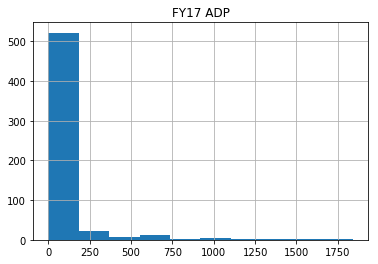

In [48]:
in_use_fy17.hist('FY17 ADP')

Will complete time series graphs to analyze ADP over the last few fiscal years.

In [49]:
# FY17 average length of stay for New England facilities in use during FY17.
in_use_fy17[facility_basics_fields + avg_length_of_stay_fields].sort_values('FY17 ALOS', ascending=False).head()

,DETLOC,Name,State,FY18 ALOS,FY17 ALOS,FY16 ALOS,FY15 ALOS
1506,BOPTHA,TERRE HAUTE USP,IN,NaN,2689.000000,NaN,NaN
1096,Redacted,Redacted,Redacted,NaN,942.000000,NaN,173.555556
1214,Redacted,Redacted,Redacted,NaN,604.000000,218.000000,408.000000
1129,Redacted,Redacted,Redacted,NaN,539.833333,384.000000,356.222222
1183,Redacted,Redacted,Redacted,NaN,434.000000,41.330189,32.690909


In [50]:
median_los = in_use_fy17['FY17 ALOS'].median()
print("Median LOS: %d" %median_los)
in_use_fy17['FY17 ALOS'].describe()

Median LOS: 7


count     567.000000
mean       34.410130
std       130.370765
min         0.000388
25%         1.014043
50%         7.500161
75%        41.493641
max      2689.000000
Name: FY17 ALOS, dtype: float64

Of the facilities in use in FY17...
* The middle 50% of people stayed for 7.5 days.

In [51]:
# Sort them by ICE threat levels. "No ICE Threat Level" means that the detainee was not listed as threat levels 1, 2, or 3.
# I am not sure whether this is equivalent to a threat level of "0" and that is just a distinction they do not make, or if
# it means the info is missing for that detainee.
in_use_fy17[facility_basics_fields + ice_threat_fields].sort_values('No ICE Threat Level', ascending=False).head()

,DETLOC,Name,State,ICE Threat Level 1,ICE Threat Level 2,ICE Threat Level 3,No ICE Threat Level
1438,STFRCTX,SOUTH TEXAS FAMILY RESIDENTIAL CENTER,TX,0.000000,0.000000,2.800000,1550.114331
1437,STCDFTX,SOUTH TEXAS DETENTION COMPLEX,TX,144.800001,111.914287,310.971433,1186.742872
1046,PIC,PORT ISABEL,TX,56.028572,37.685715,61.228572,938.628584
440,EAZ,ELOY FEDERAL CONTRACT FACILITY,AZ,230.085715,153.685715,231.857145,785.428578
9,ADLNTCA,ADELANTO ICE PROCESSING CENTER,CA,595.085718,205.685716,163.828573,726.485721


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A25A3736D8>]],
      dtype=object)

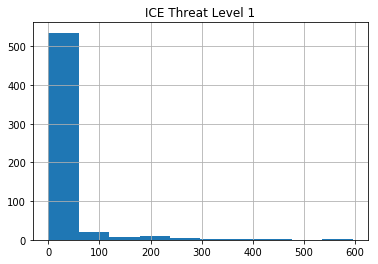

In [52]:
in_use_fy17.hist('ICE Threat Level 1')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A25A0EAE48>]],
      dtype=object)

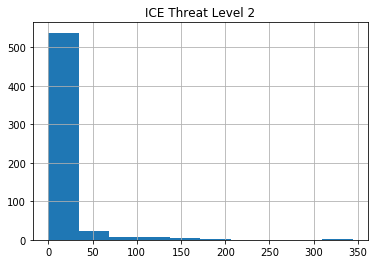

In [53]:
in_use_fy17.hist('ICE Threat Level 2')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A25A0E25C0>]],
      dtype=object)

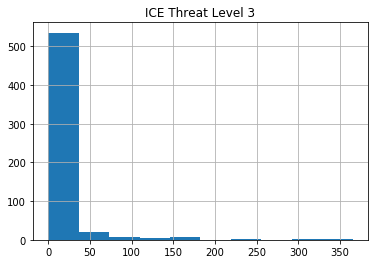

In [54]:
in_use_fy17.hist('ICE Threat Level 3')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A25A7DD5F8>]],
      dtype=object)

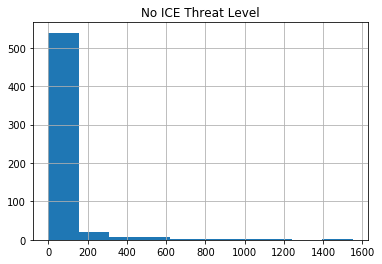

In [55]:
in_use_fy17.hist('No ICE Threat Level')

In [56]:
in_use_fy17['FY17 ADP'].describe()

count     579.000000
mean       76.756954
std       216.241545
min         0.000000
25%         0.075342
50%         1.939726
75%        45.128767
max      1839.767119
Name: FY17 ADP, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A25A626710>]],
      dtype=object)

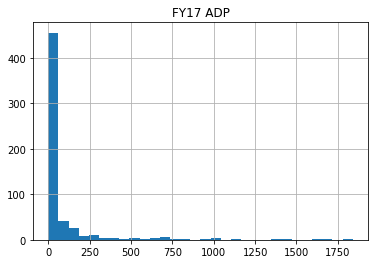

In [57]:
in_use_fy17.hist('FY17 ADP', bins=30)

### What you see from these graphs:
* The vast majority of facilities housed detainees for very short amounts of times in FY17.
* The vast majority of facilities housed very few detainees on average per day (middle 50% ADP is 1.9 detainees).

In [58]:
# Number of unused facilities?
unused_fy17 = main_df[main_df['FY17 ADP'] == 0]
print(len(unused_fy17))

1110


In [59]:
# Percentage of unused facilities-- again, using my own personal definition of use. Will be adjusted once I ask the data
# owners what a better metric of use might be.
len(unused_fy17) / len(main_df) * 100

65.8753709198813